In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy,sklearn,pylab
from scipy import io

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (9,8)


In [2]:
X = np.matrix([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.matrix([[1],[1],[0],[0]])
w0 = np.matrix([[-2],[1],[0]])
w0b=w0
l=0.07

In [3]:
s0 = scipy.special.expit(X.dot(w0))
s0

matrix([[ 0.95257413],
        [ 0.73105858],
        [ 0.73105858],
        [ 0.26894142]])

In [4]:
s0b = scipy.special.expit(X.dot(w0))
s0b

matrix([[ 0.95257413],
        [ 0.73105858],
        [ 0.73105858],
        [ 0.26894142]])

In [5]:
S0 = np.diagflat(s0[:,0])
w1=w0-((2*l*np.diag((1,1,0))+ \
        (X.T).dot(S0).dot(np.identity(4)-S0).dot(X)).I).dot(
    2*l*np.diag((1,1,0)).dot(w0)-(X.T).dot(y-s0))
w1

matrix([[ 0.06867758],
        [ 2.10887732],
        [-4.31088359]])

In [6]:
S0b = np.diagflat(s0b[:,0])
w1b=w0b-((2*l*np.diag((1,1,1))+ \
        (X.T).dot(S0b).dot(np.identity(4)-S0b).dot(X)).I).dot(
    2*l*np.diag((1,1,1)).dot(w0b)-(X.T).dot(y-s0b))
w1b

matrix([[-0.38676399],
        [ 1.40431761],
        [-2.28417115]])

In [7]:
s1 = scipy.special.expit(X.dot(w1))
s1

matrix([[ 0.88244067],
        [ 0.88938022],
        [ 0.09957047],
        [ 0.1058994 ]])

In [8]:
s1b = scipy.special.expit(X.dot(w1b))
s1b

matrix([[ 0.87311451],
        [ 0.82375785],
        [ 0.29320813],
        [ 0.21983683]])

In [9]:
S1 = np.diagflat(s1[:,0])
w2=w1-((2*l*np.diag([1,1,0])+ \
        (X.T).dot(S1).dot(np.identity(4)-S1).dot(X)).I).dot(
    2*l*np.diag((1,1,0)).dot(w1)-(X.T).dot(y-s1))
w2


matrix([[ 0.00575777],
        [ 2.36957624],
        [-4.75408128]])

In [10]:
S1b = np.diagflat(s1b[:,0])
w2b=w1b-((2*l*np.diag([1,1,1])+ \
        (X.T).dot(S1b).dot(np.identity(4)-S1b).dot(X)).I).dot(
    2*l*np.diag((1,1,1)).dot(w1b)-(X.T).dot(y-s1b))
w2b


matrix([[-0.51222668],
        [ 1.45272677],
        [-2.16271799]])

In [11]:
wine = scipy.io.loadmat("hw4_wine_dist/data")


In [12]:
class g_descent(object):
    def __init__(self,data,train,reg,eps,stoch=False,prec = 1e-15):
        self.stoch=stoch
        self.reg = reg
        self.eps=eps
        self.n=data.shape[0]
        self.w = np.zeros((data.shape[1]+1,1))
        self.data=np.concatenate((data, np.ones((data.shape[0],1))),axis = 1)
        self.train=train
        self.fulltrain = np.concatenate((self.data,self.train),axis=1)
        self.done = False
        self.prec=prec
        self.i=1
    def s(self,x):
        return scipy.special.expit(x)
    def loss_sum(self,row):
        return ((row[-1]*np.log(self.s(np.dot(row[:-1],self.w))) + 
                np.log(1-self.s(np.dot(row[:-1],self.w)))*(1-row[-1])))
    def mdf(self,w):
        return ((1/self.n)*np.dot(self.data.T,self.train-self.s(np.dot(self.data,w))) - 
                2*self.reg*np.concatenate((w[0:-1],[[0]])))
    def mdfrow(self,w, row):
        #print(row)
        return (np.dot(row[:,:-1].T,row[:,-1:]-self.s(np.dot(row[:,:-1],w))) - 
                2*self.reg*np.concatenate((w[0:-1],[[0]])))
    def loss(self):
        #print(self.fulltrain)
        return ((-1/self.n)*np.apply_along_axis(self.loss_sum,1,self.fulltrain).sum() + 
                self.reg*np.linalg.norm(np.concatenate((self.w[0:-1],[[0]]))**2))
    def update(self):
        if self.stoch==True:
            #print(self.fulltrain[self.i%self.n,:])
            inc = self.mdfrow(
                self.w,self.fulltrain[np.random.choice(self.n),np.newaxis])*self.eps
            #inc = self.mdfrow(self.w,self.fulltrain[self.i%self.n,np.newaxis])
            #print(self.i)
            #print(self.n)
            #if self.i%self.n==0:
            #    np.random.shuffle(self.fulltrain)
                #print(self.fulltrain)
        else:
            inc = self.mdf(self.w)*self.eps 
        #print(inc)
        if np.linalg.norm(inc)<=self.prec:
            self.done=True
        self.w=self.w+self.eps*inc
    def predictrow(self,row):
        return 0 if self.s(np.dot(row,self.w))[0]<0.5 else 1
    def predict(self,v):
        return np.apply_along_axis(self.predictrow,1,np.concatenate(
            (v,np.ones((v.shape[0],1))),axis=1)).reshape(v.shape[0],1)
    def score(self,v,lab):
        return np.count_nonzero(lab-self.predict(v))/lab.shape[0]
    def updatep(self):
        if(self. i !=1):
            self.eps= self.eps*(self.i)/(self.i+1)
        self.i +=1
        self.update()
    

In [13]:
grad1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=False)

In [14]:
i=0
threshold = 50
losses1 = []
while(i<threshold*1000 and grad1.done==False):  
    if i%10==0:
        #print(i/100,grad1.loss())
        losses1.insert(int(i/10),grad1.loss())
    grad1.update()
    i+=1

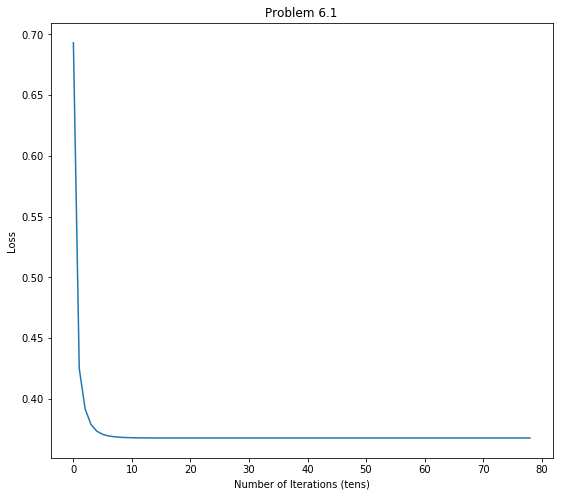

In [15]:
plt.plot(range(min(threshold*100,int(i/10)+1)),losses1)
plt.title('Problem 6.1')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (tens)") #so ~800 total
plt.show()

In [16]:
stoch1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=True)

In [17]:
j=0
losses2 = []
while(j<threshold*500 and  stoch1.done==False):
    if j%100==0:
        #print(j/100,stoch1.loss())
        losses2.insert(int(j/100),stoch1.loss())
    stoch1.update()
    j+=1

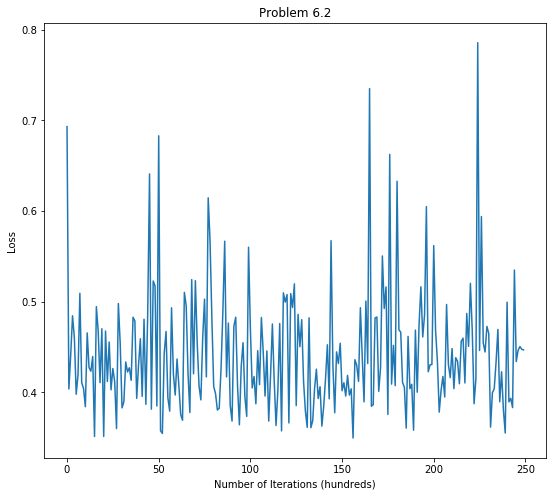

In [18]:
plt.plot(range(min(threshold*5,int(j/100)+1)),losses2)
plt.title('Problem 6.2')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (hundreds)")
plt.show()

In [19]:
stochp1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=True) 

In [20]:
k=0
losses3 = []
while(k<threshold*100 and  stochp1.done==False):
    if k%100==0:
        #print(k,stochp1.loss())
        losses3.insert(int(k/100),stochp1.loss())
    stochp1.updatep()
    k+=1


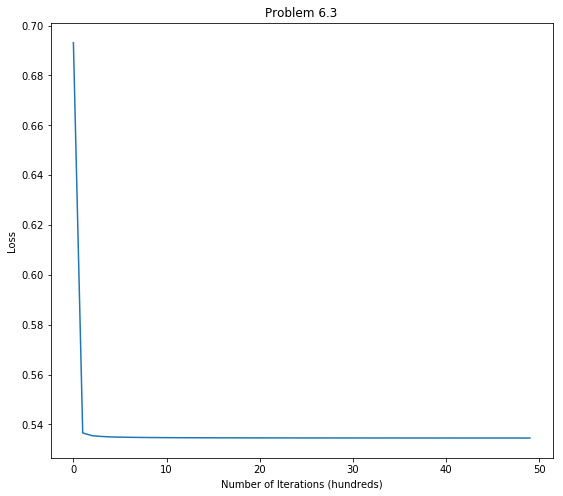

In [21]:
plt.plot(range(min(threshold,int(k/100)+1)),losses3)
plt.title('Problem 6.3')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (hundreds)")
plt.show()

In [22]:
wine_train, wine_v, wine_train_label,wine_v_label=train_test_split(
    wine['X'],wine['y'],test_size=0.99)

In [23]:
#t = 100
#for lam in [0,1/6000,0.01,0.05,0.1,0.25,0.5,0.75,1,1.5,2,5,10,15]:
#    for ep in [0.025,0.05]:
#        test = g_descent(wine_train,wine_train_label,lam,ep)
#        i=0
#        while(test.done==False and int(i/1000)<t):
#            test.update()
#            i+=1
#        i=0
#        print(lam,ep,test.score(wine_v,wine_v_label))
i=0
test = g_descent(sklearn.preprocessing.scale(
    wine_train),wine_train_label,1/6000,5)
while(test.done==False and i<100000):
    #if(i%1000==0):
#        print(test.loss())
    test.update()
    i+=1

In [24]:
test.score(sklearn.preprocessing.scale(wine_v),wine_v_label)

0.020033670033670032

In [25]:
def output(train, train_labels, test):
    grad = g_descent(sklearn.preprocessing.scale(
        train),train_labels,1/6000,5)
    i=1
    while(grad.done==False):
        grad.update()
        #if i%1000==0:
        #    print(grad.loss())
        i+=1
    out = grad.predict(sklearn.preprocessing.scale(test))
    np.savetxt(
        "winekaggleout.csv", np.column_stack(
        (np.array(
            list(range(test.shape[0]))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")

In [27]:
output(wine['X'],wine['y'],wine['X_test'])

![wine](winekaggle.PNG)

In [ ]:

# coding: utf-8

# In[1]:

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy,sklearn,pylab
from scipy import io

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (9,8)


# In[2]:

X = np.matrix([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.matrix([[1],[1],[0],[0]])
w0 = np.matrix([[-2],[1],[0]])
w0b=w0
l=0.07


# In[3]:

s0 = scipy.special.expit(X.dot(w0))
s0


# In[4]:

s0b = scipy.special.expit(X.dot(w0))
s0b


# In[5]:

S0 = np.diagflat(s0[:,0])
w1=w0-((2*l*np.diag((1,1,0))+         (X.T).dot(S0).dot(np.identity(4)-S0).dot(X)).I).dot(
    2*l*np.diag((1,1,0)).dot(w0)-(X.T).dot(y-s0))
w1


# In[6]:

S0b = np.diagflat(s0b[:,0])
w1b=w0b-((2*l*np.diag((1,1,1))+         (X.T).dot(S0b).dot(np.identity(4)-S0b).dot(X)).I).dot(
    2*l*np.diag((1,1,1)).dot(w0b)-(X.T).dot(y-s0b))
w1b


# In[7]:

s1 = scipy.special.expit(X.dot(w1))
s1


# In[8]:

s1b = scipy.special.expit(X.dot(w1b))
s1b


# In[9]:

S1 = np.diagflat(s1[:,0])
w2=w1-((2*l*np.diag([1,1,0])+         (X.T).dot(S1).dot(np.identity(4)-S1).dot(X)).I).dot(
    2*l*np.diag((1,1,0)).dot(w1)-(X.T).dot(y-s1))
w2


# In[10]:

S1b = np.diagflat(s1b[:,0])
w2b=w1b-((2*l*np.diag([1,1,1])+         (X.T).dot(S1b).dot(np.identity(4)-S1b).dot(X)).I).dot(
    2*l*np.diag((1,1,1)).dot(w1b)-(X.T).dot(y-s1b))
w2b


# In[11]:

wine = scipy.io.loadmat("hw4_wine_dist/data")


# In[12]:

class g_descent(object):
    def __init__(self,data,train,reg,eps,stoch=False,prec = 1e-15):
        self.stoch=stoch
        self.reg = reg
        self.eps=eps
        self.n=data.shape[0]
        self.w = np.zeros((data.shape[1]+1,1))
        self.data=np.concatenate((data, np.ones((data.shape[0],1))),axis = 1)
        self.train=train
        self.fulltrain = np.concatenate((self.data,self.train),axis=1)
        self.done = False
        self.prec=prec
        self.i=1
    def s(self,x):
        return scipy.special.expit(x)
    def loss_sum(self,row):
        return ((row[-1]*np.log(self.s(np.dot(row[:-1],self.w))) + 
                np.log(1-self.s(np.dot(row[:-1],self.w)))*(1-row[-1])))
    def mdf(self,w):
        return ((1/self.n)*np.dot(self.data.T,self.train-self.s(np.dot(self.data,w))) - 
                2*self.reg*np.concatenate((w[0:-1],[[0]])))
    def mdfrow(self,w, row):
        #print(row)
        return (np.dot(row[:,:-1].T,row[:,-1:]-self.s(np.dot(row[:,:-1],w))) - 
                2*self.reg*np.concatenate((w[0:-1],[[0]])))
    def loss(self):
        #print(self.fulltrain)
        return ((-1/self.n)*np.apply_along_axis(self.loss_sum,1,self.fulltrain).sum() + 
                self.reg*np.linalg.norm(np.concatenate((self.w[0:-1],[[0]]))**2))
    def update(self):
        if self.stoch==True:
            #print(self.fulltrain[self.i%self.n,:])
            inc = self.mdfrow(
                self.w,self.fulltrain[np.random.choice(self.n),np.newaxis])*self.eps
            #inc = self.mdfrow(self.w,self.fulltrain[self.i%self.n,np.newaxis])
            #print(self.i)
            #print(self.n)
            #if self.i%self.n==0:
            #    np.random.shuffle(self.fulltrain)
                #print(self.fulltrain)
        else:
            inc = self.mdf(self.w)*self.eps 
        #print(inc)
        if np.linalg.norm(inc)<=self.prec:
            self.done=True
        self.w=self.w+self.eps*inc
    def predictrow(self,row):
        return 0 if self.s(np.dot(row,self.w))[0]<0.5 else 1
    def predict(self,v):
        return np.apply_along_axis(self.predictrow,1,np.concatenate(
            (v,np.ones((v.shape[0],1))),axis=1)).reshape(v.shape[0],1)
    def score(self,v,lab):
        return np.count_nonzero(lab-self.predict(v))/lab.shape[0]
    def updatep(self):
        if(self. i !=1):
            self.eps= self.eps*(self.i)/(self.i+1)
        self.i +=1
        self.update()
    


# In[13]:

grad1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=False)


# In[14]:

i=0
threshold = 50
losses1 = []
while(i<threshold*1000 and grad1.done==False):  
    if i%10==0:
        #print(i/100,grad1.loss())
        losses1.insert(int(i/10),grad1.loss())
    grad1.update()
    i+=1


# In[15]:

plt.plot(range(min(threshold*100,int(i/10)+1)),losses1)
plt.title('Problem 6.1')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (tens)") #so ~800 total
plt.show()


# In[16]:

stoch1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=True)


# In[17]:

j=0
losses2 = []
while(j<threshold*500 and  stoch1.done==False):
    if j%100==0:
        #print(j/100,stoch1.loss())
        losses2.insert(int(j/100),stoch1.loss())
    stoch1.update()
    j+=1


# In[18]:

plt.plot(range(min(threshold*5,int(j/100)+1)),losses2)
plt.title('Problem 6.2')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (hundreds)")
plt.show()


# In[19]:

stochp1 = g_descent(sklearn.preprocessing.scale(
    wine['X']),wine['y'],0.5,0.5,stoch=True) 


# In[20]:

k=0
losses3 = []
while(k<threshold*100 and  stochp1.done==False):
    if k%100==0:
        #print(k,stochp1.loss())
        losses3.insert(int(k/100),stochp1.loss())
    stochp1.updatep()
    k+=1


# In[21]:

plt.plot(range(min(threshold,int(k/100)+1)),losses3)
plt.title('Problem 6.3')
plt.ylabel("Loss")
plt.xlabel("Number of Iterations (hundreds)")
plt.show()


# In[22]:

wine_train, wine_v, wine_train_label,wine_v_label=train_test_split(
    wine['X'],wine['y'],test_size=0.99)


# In[23]:

#t = 100
#for lam in [0,1/6000,0.01,0.05,0.1,0.25,0.5,0.75,1,1.5,2,5,10,15]:
#    for ep in [0.025,0.05]:
#        test = g_descent(wine_train,wine_train_label,lam,ep)
#        i=0
#        while(test.done==False and int(i/1000)<t):
#            test.update()
#            i+=1
#        i=0
#        print(lam,ep,test.score(wine_v,wine_v_label))
i=0
test = g_descent(sklearn.preprocessing.scale(wine_train),wine_train_label,1/6000,5)
while(test.done==False and i<100000):
    #if(i%1000==0):
#        print(test.loss())
    test.update()
    i+=1


# In[24]:

test.score(sklearn.preprocessing.scale(wine_v),wine_v_label)


# In[25]:

def output(train, train_labels, test):
    grad = g_descent(sklearn.preprocessing.scale(
        train),train_labels,1/6000,5)
    i=1
    while(grad.done==False):
        grad.update()
        #if i%1000==0:
        #    print(grad.loss())
        i+=1
    out = grad.predict(sklearn.preprocessing.scale(test))
    np.savetxt(
        "winekaggleout.csv", np.column_stack(
        (np.array(
            list(range(test.shape[0]))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")


# In[27]:

output(wine['X'],wine['y'],wine['X_test'])


# ![wine](winekaggle.PNG)

# In[ ]:




# In[ ]:




# In[ ]:



